In [1]:
import torch
import yaml
from pkg.data.datasets import ADNIDataset, TransformDataset
from pkg.data.datamodules import ADNIDataModule
from pkg.utils.instantiate import instantiate
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader, Subset

/home/cestari/.conda/envs/adni_rcc/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
with open("./config.yaml", "r") as f:
    cfg = yaml.load(f, yaml.Loader)

print(cfg)

{'datamodule': {'class': 'pkg.data.datamodules.ADNIDataModule', 'args': {'data': {'data_dir': '/project/aereditato/cestari/adni-mri-classification/data/preprocessing_multimodal/data/', 'scan_csv': '/project/aereditato/cestari/adni-mri-classification/data/preprocessing_multimodal/csv/dataset_multimodal.csv', 'diagnostic_csv': '/project/aereditato/cestari/adni-mri-classification/data/preprocessing_multimodal/csv/DXSUM_02Feb2026.csv', 'diagnosis': [1, 2, 3], 'tolerance': 180, 'modalities': {'MRI': ['MRI-T1-3T'], 'PET': ['PET-FDG']}}, 'split': {'mode': 'kfold', 'seed': 42, 'folds': 5, 'test_size': 0.1, 'val_size': 0.2}, 'loader': {'batch_size': 16, 'weighted_sampling': False, 'shuffle': True}, 'transform': [{'random_flip': {'p': 0.5}}, {'random_affine': {'p': 0.5, 'degrees': 5, 'translation': 5}}, {'random_noise': {'p': 0.2, 'std': 0.02}}]}}, 'model': {'class': 'pkg.models.model_resnet18.ResNet18', 'args': {'initial_filters': 8, 'dropout': 0.3, 'num_classes': 3}}, 'optimizer': {'name': 'Ad

In [3]:
ds = ADNIDataset(
        "./data/preprocessing_multimodal/data", 
        "./data/preprocessing_multimodal/csv/dataset_multimodal.csv",
        "./data/preprocessing_multimodal/csv/DXSUM_02Feb2026.csv",
        {"MRI":["MRI-T1-3T"], "PET":["PET-FDG"]},
        tolerance=180
    )

In [4]:
ds.setup()

Matching scans to diagnoses...


Verifying scans available in dir...
Creating multimodal samples...


In [5]:
df = ds.df_multimodal
print(len( df[ (df["PET"].notna()) & (df["MRI"].notna())]))
print(len( df[ (df["PET"].isna()) & (df["MRI"].notna())]))
print(len( df[ (df["PET"].notna()) & (df["MRI"].isna())]))

1499
12927
1178


#### Augmentation tests

In [6]:
import torchio as tio
import torch

In [7]:
index = 9600

x = ds[index]["X"]
mask = ds[index]["mask"]

print(mask)

tensor([1, 1])


In [67]:
tf = tio.Compose([
    tio.RandomAffine(),
    tio.RandomNoise(0, [0, 0.1]),
    tio.RandomFlip(),
])

In [68]:
ds_t  = TransformDataset(Subset(ds, [i for i in range(20)]), transform=tf)

In [71]:
sample = ds_t[5]["X"] 

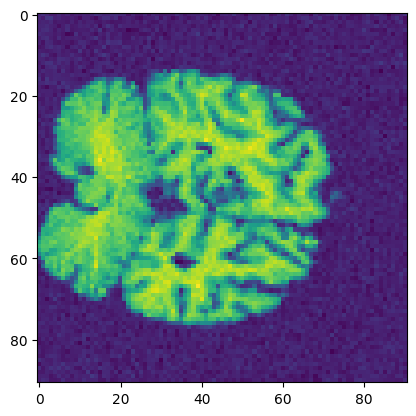

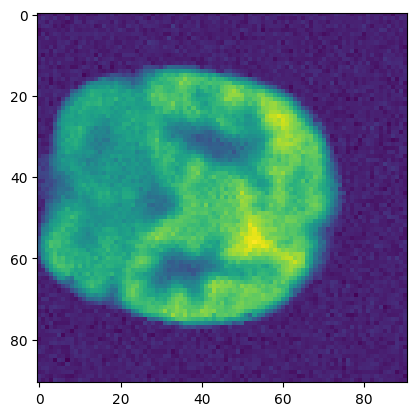

In [72]:
plt.imshow(sample[0,0,:,30,:])
plt.show()

plt.imshow(sample[1,0,:,30,:])
plt.show()